In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [5]:
uni = pd.read_csv("D:\ExcelR Data Science\Data Science (Andheri-Sadanand)\Data Set Files/8.Universities.csv")

In [6]:
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [19]:
# Normalizing function and removing categorical variables
scaler = StandardScaler()
scaleuni= scaler.fit_transform(Univ.iloc[:,1:])

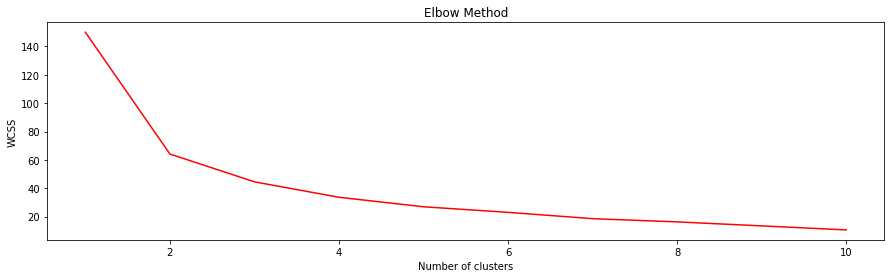

In [21]:
wcss = []  # within-cluster sum-of-squares criterion to find optimum number of cluster and k-value
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaleuni)
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,4))   
plt.plot(range(1, 11), wcss,color="red")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

can go for optimal k=3,4,6 

In [22]:
wcss

[149.99999999999997,
 64.1452839501027,
 44.531761731450956,
 33.654341806512235,
 26.953681627883103,
 23.028199078329926,
 18.568917030859872,
 16.301664640974554,
 13.47880438976081,
 10.64054544753914]

In [26]:
#Build Cluster algorithm as per k-value (3)
clusters_new = KMeans(3, random_state=42)
clusters_new.fit(scaleuni)

KMeans(n_clusters=3, random_state=42)

In [27]:
clusters_new.labels_

array([2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 1, 0])

In [30]:
#Assign clusters to the data set by creating and adding it as new column
uni['clusterid_new'] = clusters_new.labels_
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [31]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.90738779,  0.73921344, -0.76914845, -0.76617344,  0.97562148,
         0.61998454],
       [-1.93029211, -1.98148647,  1.59348244,  1.63857398, -1.23359906,
        -1.68680366],
       [-0.03711013,  0.10608541,  0.04570052,  0.02843875, -0.32051642,
         0.09727948]])

In [33]:
#to find the average of universities based on cluster given 
uni.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate
,,mean,mean,mean,mean,mean,mean
0,0,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
1,1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,2,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333


we conclude by cluster profiling and ranking the universities we get the rank as -> cluster -0,2,1 respectively